<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/Compare_view_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Function 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# VGG model

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Create Features Extraction Function

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

# Create Loading the data Function

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return dataset, loader

# Install Font TH-SARABUN

In [9]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [10]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Create Compute Distance Function

In [11]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[i],diff_view[i])
        A.append(x)
    return(A)

# Create Function Show Image

# เปรียบเทียบกระจกรถ

In [12]:
car1_dataset , car1_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/mirror/base')
dmg1_dataset , dmg1_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/mirror/dmg')

In [13]:
id1b = get_features(vgg,car1_loader)
id1v = get_features(vgg,dmg1_loader)

100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


In [14]:
id_mir = get_euclidean(id1b,id1v)
id_mir 

[23.09232521057129,
 21.460844039916992,
 12.544066429138184,
 25.223430633544922,
 22.75872039794922,
 14.932421684265137,
 11.871809005737305,
 21.483619689941406,
 5.219032287597656,
 15.96945571899414]

In [15]:
id1f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID1F.png')
id1_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID1_1.png')
id3f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID3F.png')
id3_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID3_1.png')

Text(200, 400, 'Distance = 25.223')

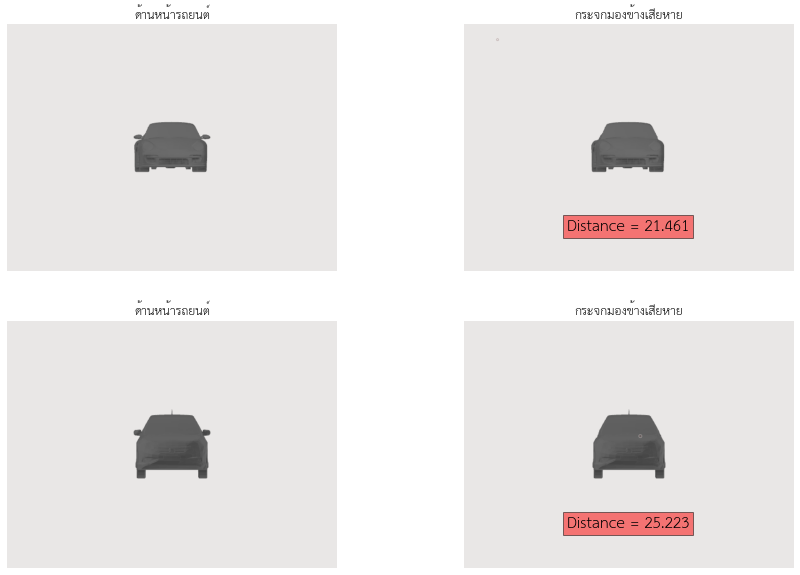

In [16]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id3f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id3_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[3],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

In [17]:
id5f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID5F.png')
id5_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID5_1.png')
id8f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID8F.png')
id8_1 = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/dmg/test/ID8_1.png')

Text(200, 400, 'Distance = 5.219')

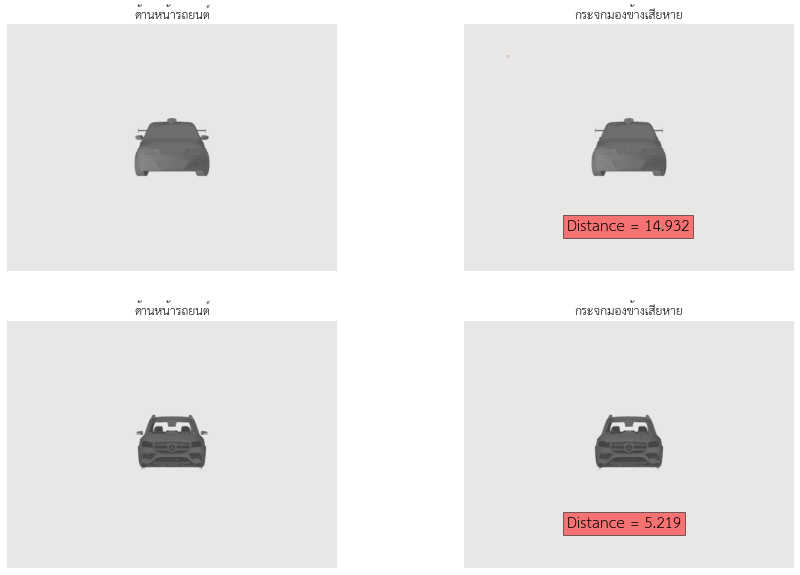

In [18]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id5f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id5_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[5],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id8f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id8_1)
plt.axis('off')
plt.title('กระจกมองข้างเสียหาย')
plt.text(200,400,'Distance = '+str(round(id_mir[8],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

# เปรียบด้านหน้ารถ

In [19]:
car2_dataset , car2_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/front/base')
dmg2_dataset , dmg2_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/front/dmg')

In [20]:
id2b = get_features(vgg,car2_loader)
id2v = get_features(vgg,dmg2_loader)

100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


In [21]:
id_front = get_euclidean(id2b,id2v)
id_front

[4.731649875640869,
 10.689799308776855,
 13.018043518066406,
 4.00739049911499,
 6.044846534729004,
 37.668819427490234,
 11.454874038696289,
 3.5701797008514404,
 21.975290298461914]

In [22]:
id1f = cv2.imread('/content/drive/MyDrive/3D_Model/mirror/base/test/ID1F.png')
id1dmgf = cv2.imread('/content/drive/MyDrive/3D_Model/front/dmg/test/ID1dmgf.png')
id3f = cv2.imread('/content/drive/MyDrive/3D_Model/front/base/test/ID3F.png')
id3dmgf = cv2.imread('/content/drive/MyDrive/3D_Model/front/dmg/test/ID3dmgf.png')

Text(200, 400, 'Distance = 4.007')

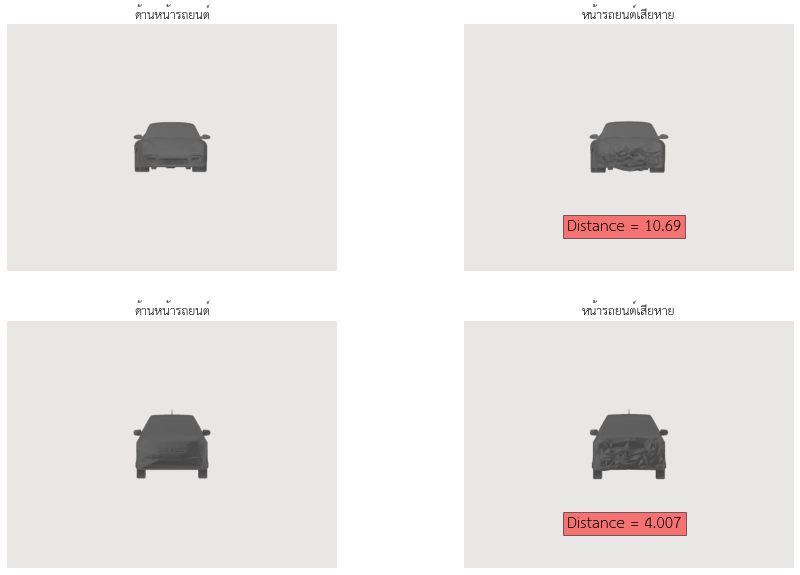

In [23]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1dmgf)
plt.axis('off')
plt.title('หน้ารถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_front[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id3f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id3dmgf)
plt.axis('off')
plt.title('หน้ารถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_front[3],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

In [24]:
min(id_front)

3.5701797008514404

In [25]:
max(id_front)

37.668819427490234

# Create Scale Normalize front car

In [26]:
def get_damage(distance):
    f_car = ((distance[0] - 3.57)/(37.564-3.57)*100)
    r_car = ((distance[1] - 4.308)/(37.966-4.308)*100)
    b_car = ((distance[2] - 3.401)/(21.090-3.401)*100)
    l_car = ((distance[3] - 4.308)/(37.564-4.308)*100)
    print(f'ด้านหน้าของรถยนต์มีความเสียหาย {round(f_car,2)}%')
    print(f'ด้านขวาของรถยนต์มีความเสียหาย {round(r_car,2)}%')
    print(f'ด้านหลังของรถยนต์มีความเสียหาย {round(b_car,2)}%')
    print(f'ด้านซ้ายของรถยนต์มีความเสียหาย {round(l_car,2)}%')

In [27]:
get_damage(id_front)

ด้านหน้าของรถยนต์มีความเสียหาย 3.42%
ด้านขวาของรถยนต์มีความเสียหาย 18.96%
ด้านหลังของรถยนต์มีความเสียหาย 54.37%
ด้านซ้ายของรถยนต์มีความเสียหาย -0.9%


# เปรียบเทียบด้านขวารถยนต์

In [28]:
car3_dataset , car3_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/right/base')
dmg3_dataset , dmg3_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/right/dmg')

In [29]:
id3b = get_features(vgg,car3_loader)
id3v = get_features(vgg,dmg3_loader)

100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


In [30]:
id_right = get_euclidean(id3b,id3v)
id_right

[13.149837493896484,
 7.669874668121338,
 14.639954566955566,
 37.9657096862793,
 25.131519317626953,
 6.752801895141602,
 4.3077239990234375,
 8.920160293579102,
 10.341771125793457]

In [31]:
max(id_right)

37.9657096862793

In [32]:
min(id_right)

4.3077239990234375

In [38]:
id1r = cv2.imread('/content/drive/MyDrive/3D_Model/right/base/test/ID1R.png')
id1dmgr = cv2.imread('/content/drive/MyDrive/3D_Model/right/dmg/test/ID1dmgr.png')
id3r = cv2.imread('/content/drive/MyDrive/3D_Model/right/base/test/ID3R.png')
id3dmgr = cv2.imread('/content/drive/MyDrive/3D_Model/right/dmg/test/ID3dmgr.png')

Text(200, 400, 'Distance = 37.966')

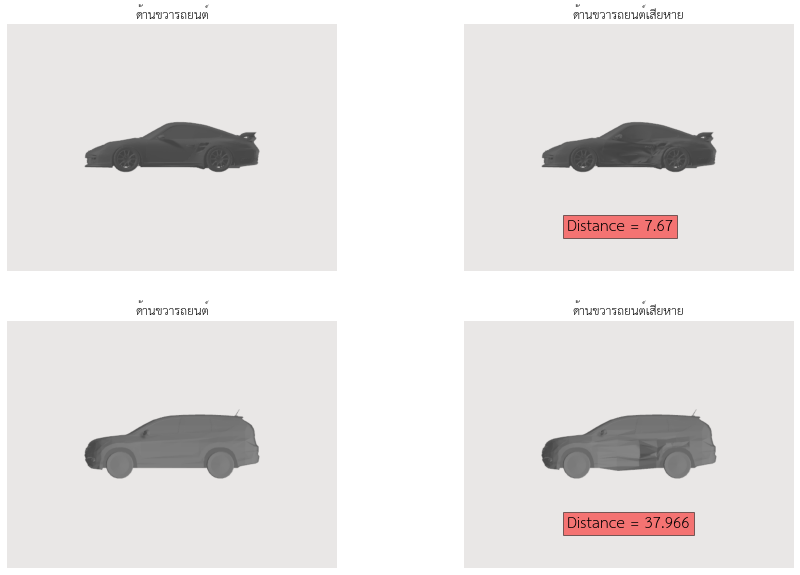

In [42]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1r)
plt.axis('off')
plt.title('ด้านขวารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1dmgr)
plt.axis('off')
plt.title('ด้านขวารถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_right[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id3r)
plt.axis('off')
plt.title('ด้านขวารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id3dmgr)
plt.axis('off')
plt.title('ด้านขวารถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_right[3],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

# เปรียบเทียบด้านหลังรถยนต์

In [33]:
car4_dataset , car4_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/back/base')
dmg4_dataset , dmg4_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/back/dmg')

In [34]:
id4b = get_features(vgg,car4_loader)
id4v = get_features(vgg,dmg4_loader)

100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


In [35]:
id_back = get_euclidean(id4b,id4v)
id_back

[3.4010446071624756,
 10.535595893859863,
 21.090316772460938,
 18.096567153930664,
 7.489353179931641,
 9.452399253845215,
 6.244676113128662,
 6.499940395355225,
 3.6292564868927]

In [36]:
min(id_back)

3.4010446071624756

In [37]:
max(id_back)

21.090316772460938

In [46]:
id1b    = cv2.imread('/content/drive/MyDrive/3D_Model/back/base/test/ID1B.png')
id1dmgb = cv2.imread('/content/drive/MyDrive/3D_Model/back/dmg/test/ID1dmgb.png')
id3b    = cv2.imread('/content/drive/MyDrive/3D_Model/back/base/test/ID3B.png')
id3dmgb = cv2.imread('/content/drive/MyDrive/3D_Model/back/dmg/test/ID3dmgb.png')

Text(200, 400, 'Distance = 18.097')

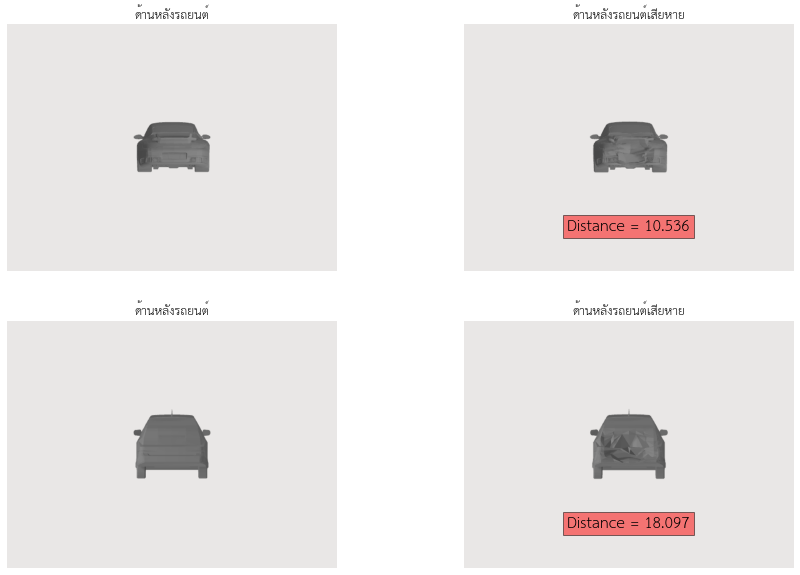

In [47]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1b)
plt.axis('off')
plt.title('ด้านหลังรถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1dmgb)
plt.axis('off')
plt.title('ด้านหลังรถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_back[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id3b)
plt.axis('off')
plt.title('ด้านหลังรถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id3dmgb)
plt.axis('off')
plt.title('ด้านหลังรถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_back[3],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

# Left


In [48]:
car4_dataset , car4_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Left/base')
dmg4_dataset , dmg4_loader = get_dataset(r'/content/drive/MyDrive/3D_Model/Left/dmg')

In [49]:
id4b = get_features(vgg,car4_loader)
id4v = get_features(vgg,dmg4_loader)

100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


In [50]:
id_left = get_euclidean(id4b,id4v)
id_left

[29.44742202758789,
 21.9086856842041,
 14.33310317993164,
 48.07469940185547,
 29.056917190551758,
 11.230436325073242,
 15.83128833770752,
 15.220380783081055,
 23.24848747253418]

In [51]:
id1l    = cv2.imread('/content/drive/MyDrive/3D_Model/Left/base/test/ID1L.png')
id1dmgl = cv2.imread('/content/drive/MyDrive/3D_Model/Left/dmg/test/ID1dmgl.png')
id3l    = cv2.imread('/content/drive/MyDrive/3D_Model/Left/base/test/ID3L.png')
id3dmgl = cv2.imread('/content/drive/MyDrive/3D_Model/Left/dmg/test/ID3dmgl.png')

Text(200, 400, 'Distance = 48.075')

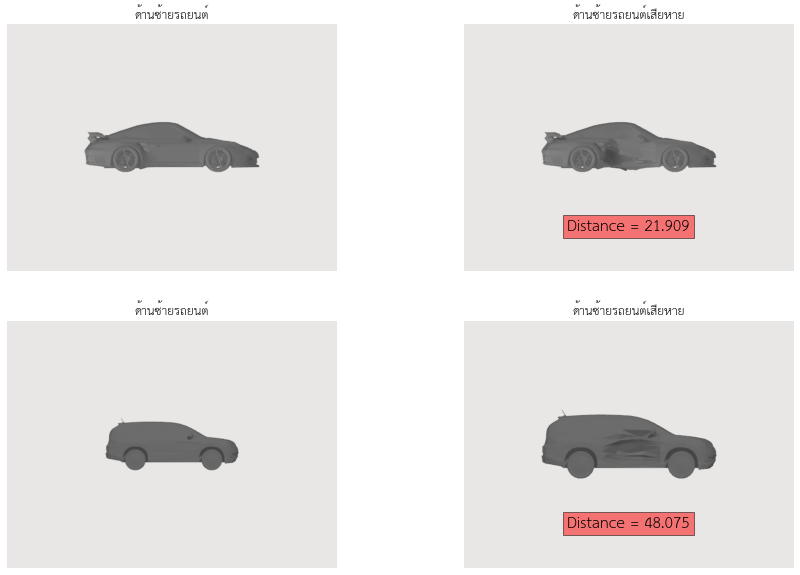

In [53]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1l)
plt.axis('off')
plt.title('ด้านซ้ายรถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1dmgl)
plt.axis('off')
plt.title('ด้านซ้ายรถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_left[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id3l)
plt.axis('off')
plt.title('ด้านซ้ายรถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id3dmgl)
plt.axis('off')
plt.title('ด้านซ้ายรถยนต์เสียหาย')
plt.text(200,400,'Distance = '+str(round(id_left[3],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))